In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Sales_DataSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/advertising.csv")

In [5]:
Sales_DataSet.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
Sales_DataSet.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**No Missing Values**

In [7]:
Sales_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
Sales_DataSet.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Correlation**

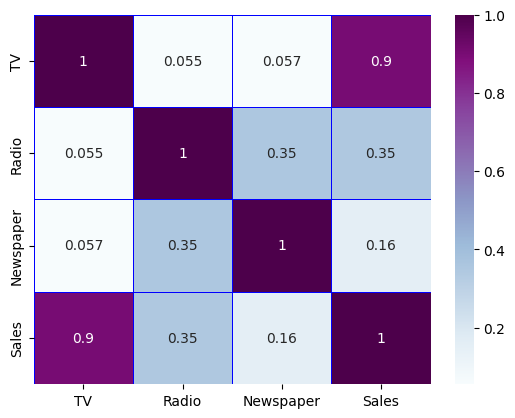

In [9]:
#Checking Corelation of Sales
sns.heatmap(Sales_DataSet.corr(),annot=True,linecolor="blue",linewidths=0.5,cmap="BuPu")
plt.show()



*   TV And Sales have strong positive correlation
*   The higher the TV advertisment, the higher the Sales



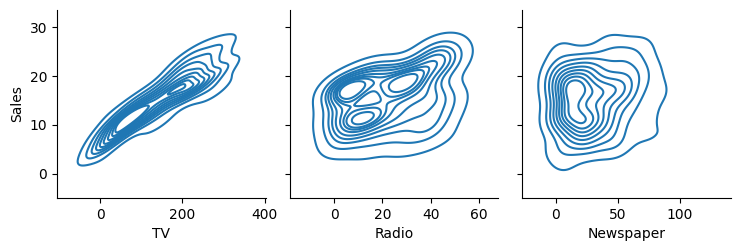

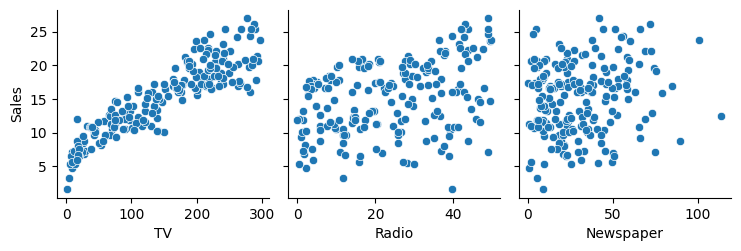

In [10]:
sns.pairplot(Sales_DataSet,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="kde")
sns.pairplot(Sales_DataSet,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="scatter")

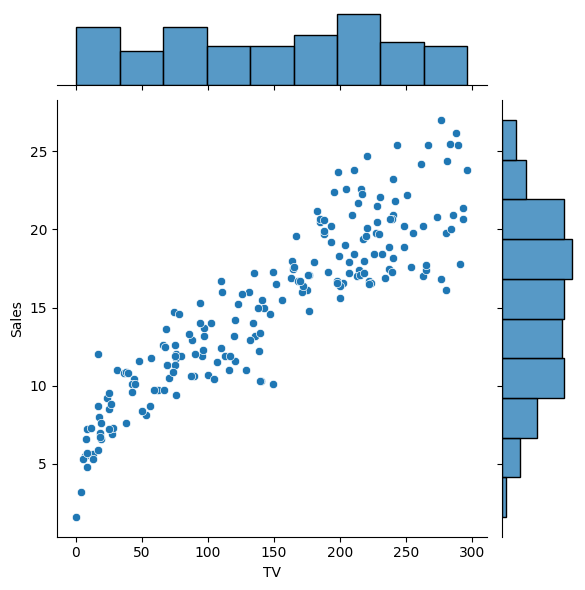

In [11]:
sns.jointplot(data=Sales_DataSet,x="TV",y="Sales")

**Model Selection And Prediction**

In [21]:
from sklearn.model_selection import train_test_split
x = Sales_DataSet[["TV"]]
y = Sales_DataSet[["Sales"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
Predict = model.predict(x_test)
Predicted_df = pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':Predict.squeeze()})
print(Predicted_df.head())

     Actual  Predicted
18     11.3  10.929130
170     8.4   9.883991
107    12.0  12.083137
98     25.4  22.931893
177    16.7  16.426994


**Calculating Mean Absolute Error And Root Mean Squared Error between Actual and Predicted Values**

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,Predict)
MSE = mean_squared_error(y_test,Predict)
RMSE = np.sqrt(MSE)
print("Mean Absolute Error : ",MAE)
print("Mean Squared Error : ",MSE)
print("Root Mean Squared Error : ",RMSE)

Mean Absolute Error :  2.01486731475948
Mean Squared Error :  6.639091226559302
Root Mean Squared Error :  2.576643403065178
